<a href="https://colab.research.google.com/github/mkorlyakova/Digital-Twins/blob/main/conferenc_turbocon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files #модуль для загрузки файлов в colab
import numpy as np #библиотека для работы с массивами данных
import pandas as pd #библиотека для обработки и анализа данных
import matplotlib.pyplot as plt #библиотека для визуализации данных
# "Магическая"команда python для запуска библиотеки в ноутбуке
%matplotlib inline

from tensorflow.keras import utils #модуль с утилитами кераса, будем использовать для вызова метода преобразования категорий в вектора

from tensorflow.keras.models import Sequential #последовательная модель нейросети кераса
# Загружаем стандартные слои нейросети(полносвязный, регуляризации, нормализации, векторного представления слов, выравнивания, активации)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation, Reshape
# Загружаем сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
# Загружаем рекуррентные слои
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
# Загружаем алгоритмы обучения/оптимизации
from tensorflow.python.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence #инструменты предобработки текста от кераса
from sklearn.model_selection import train_test_split #модуль для разбиения данных на обучающую и тестовую выборки

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
import os

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving data2_10.csv to data2_10.csv
Saving data17_10.csv to data17_10.csv
Saving data18_11_10.csv to data18_11_10.csv
Saving data18_11_11.csv to data18_11_11.csv
Saving data18_11_15.csv to data18_11_15.csv


In [ ]:
TARGET = ['Pпха1','tпха1']
TARGET[0]

'Pпха1'

In [ ]:
Col_list = ['/Pкха', 'Pпха1', 't1впг', '/t1пг', 't2кха', '/t2пг', '/t3пг','/t4пг', '/t5пг', '/t6пг', '/t7пг', "впг''", "tвпг'", 'tпха1']

In [ ]:
xLen = 10
h = 5

step_n = 1000

path_1 = './'
List_par1=[]

X_data=[]
y_data=[]

for file in os.listdir(path_1):
    if file.endswith(".csv"):
        List_par1.append(path_1+file)
        #if file[0]=='t':
        #  List_par.append(file)
        print(path_1+file)
        f2=pd.read_csv(path_1+file)
        f2 = f2[Col_list]
        print(f2.head())
        FEATURE =f2.columns.tolist()

        FEATURE.remove(TARGET[0])
        FEATURE.remove(TARGET[1])
        #FEATURE.remove('time')
        n = f2.shape[0]-300-xLen-h
        n1 = n // step_n
        if n1==0:
            n1=1
        
        for k in range(step_n-1):
            i = n1 * k
            x = f2[FEATURE].iloc[i:i+xLen,:].values
            x = x.flatten()
            y = f2[TARGET].iloc[i+xLen+h,:].values.flatten()
            X_data.append(x)
            y_data.append(y)
X_df = np.array(X_data)
y_df = np.array(y_data)
        

dg = pd.DataFrame(data=X_df)
dgy=pd.DataFrame(data=y_data)

dg.to_csv('X_data.csv')
dgy.to_csv('y_data.csv')        
        
        
List_par1      

./data17_10.csv
   /Pкха  Pпха1   t1впг   /t1пг   t2кха  ...   /t6пг   /t7пг   впг''   tвпг'   tпха1
0 -0.074 -0.029  24.368  26.253  24.067  ...  25.699  25.644  24.218  23.967  24.468
1 -0.075 -0.030  24.368  26.198  24.067  ...  25.699  25.706  24.218  23.967  24.468
2 -0.075 -0.029  24.368  26.198  24.067  ...  25.761  25.644  24.218  23.967  24.468
3 -0.073 -0.028  24.368  26.260  24.067  ...  25.761  25.644  24.218  23.967  24.468
4 -0.075 -0.029  24.368  26.260  24.067  ...  25.699  25.706  24.218  23.967  24.468

[5 rows x 14 columns]
./data18_11_10.csv
   /Pкха  Pпха1   t1впг   /t1пг  ...   /t7пг    впг''    tвпг'   tпха1
0  0.174  0.271  93.725  85.209  ...  83.782  107.476  108.633  84.675
1  0.173  0.270  93.725  84.886  ...  83.513  107.476  107.682  84.420
2  0.172  0.269  93.469  84.886  ...  83.406  107.348  107.682  84.190
3  0.171  0.268  93.469  85.002  ...  83.406  107.348  106.808  84.190
4  0.171  0.267  93.239  85.002  ...  83.029  107.142  106.808  83.935

[5 ro

KeyError: ignored

In [ ]:
dg.shape

(4995, 120)

In [ ]:
k=[]
for i in range((dg.shape[0]//999)):
  m_list=[]
  for j in range(100,800):
    m_list.append(dg.iloc[i*999+j,8].copy())
  k.append([np.max(m_list), np.min(m_list), np.mean(m_list), np.std(m_list)])
print(np.array(k) )  

[[1.17203000e+02 2.63360000e+01 4.45689614e+01 3.22097364e+01]
 [1.09507000e+02 7.00480000e+01 9.87878429e+01 1.11928212e+01]
 [2.56350000e+01 2.53090000e+01 2.54610243e+01 6.20392570e-02]
 [1.11159000e+02 1.03966000e+02 1.08945471e+02 1.31445850e+00]
 [2.67270000e+01 2.46540000e+01 2.53132529e+01 6.38585410e-01]]


In [ ]:
FEATURE[8]

'/t6пг'

In [ ]:

path_='/content/'

dg=pd.read_csv(path_+'X_data.csv')
dgy=pd.read_csv(path_+'y_data.csv')

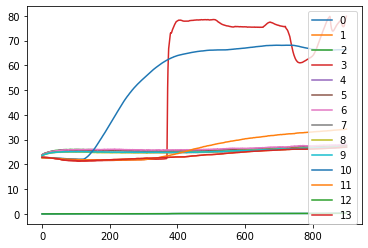

In [ ]:
dg.iloc[:900,1:15].plot()
plt.show()

In [ ]:
dg.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,0,-0.074,24.368,26.253,24.067,26.088,26.033,26.143,25.754,25.699,25.644,24.218,23.967,-0.075,24.368,26.198,24.067,26.088,26.033,26.143,25.816,25.699,25.706,24.218,23.967,-0.075,24.368,26.198,24.067,26.088,26.033,26.143,25.754,25.761,25.644,24.218,23.967,-0.073,24.368,26.260,...,25.761,25.706,24.218,23.967,-0.074,24.368,26.260,24.067,26.150,26.095,26.150,25.816,25.761,25.706,24.218,23.967,-0.074,24.368,26.260,24.067,26.150,26.095,26.150,25.761,25.761,25.706,24.218,23.967,-0.074,24.368,26.260,24.067,26.150,26.158,26.150,25.824,25.761,25.651,24.218,23.967
1,1,-0.073,24.393,26.268,23.942,26.158,26.103,26.158,25.824,25.769,25.714,24.218,23.942,-0.074,24.368,26.213,23.942,26.221,26.103,26.158,25.824,25.769,25.714,24.218,23.942,-0.075,24.368,26.213,23.867,26.221,26.103,26.221,25.824,25.769,25.714,24.218,23.967,-0.074,24.393,26.276,...,25.714,25.659,24.218,23.942,-0.075,24.393,26.221,23.691,26.166,26.056,26.166,25.831,25.776,25.721,24.218,23.967,-0.073,24.393,26.221,23.616,26.166,26.001,26.111,25.831,25.721,25.721,24.218,23.967,-0.075,24.393,26.283,23.616,26.166,26.001,26.111,25.831,25.721,25.721,24.218,23.942
2,2,-0.075,24.393,26.111,23.491,26.173,26.126,26.118,25.839,25.729,25.666,24.218,23.942,-0.075,24.368,26.173,23.516,26.173,26.126,26.118,25.784,25.674,25.729,24.218,23.967,-0.074,24.368,26.173,23.516,26.118,26.008,26.126,25.784,25.674,25.729,24.218,23.967,-0.074,24.393,26.181,...,25.736,25.681,24.218,23.967,-0.075,24.393,26.181,23.516,26.243,25.961,26.126,25.791,25.619,25.681,24.218,23.967,-0.074,24.393,26.126,23.516,26.126,26.023,26.126,25.729,25.681,25.681,24.218,23.967,-0.075,24.393,26.126,23.491,26.126,26.023,26.126,25.791,25.681,25.681,24.218,23.967
3,3,-0.075,24.368,26.188,23.566,26.188,26.023,26.188,25.791,25.744,25.681,24.218,23.942,-0.074,24.368,26.251,23.566,26.251,26.086,26.188,25.854,25.744,25.744,24.218,23.942,-0.075,24.368,26.251,23.591,26.251,26.086,26.188,25.854,25.689,25.744,24.218,23.967,-0.073,24.393,26.251,...,25.689,25.752,24.218,23.967,-0.074,24.393,26.251,23.616,26.196,26.086,26.314,25.862,25.752,25.752,24.218,23.967,-0.074,24.393,26.251,23.641,26.196,26.086,26.251,25.862,25.689,25.752,24.243,23.967,-0.074,24.393,26.314,23.641,26.259,26.149,26.251,25.862,25.752,25.752,24.218,23.942
4,4,-0.075,24.418,26.321,23.742,26.266,26.094,26.259,25.869,25.814,25.814,24.218,23.967,-0.073,24.393,26.259,23.742,26.204,26.094,26.259,25.924,25.814,25.752,24.218,23.967,-0.074,24.393,26.259,23.716,26.266,26.156,26.259,25.869,25.759,25.814,24.218,23.967,-0.075,24.418,26.321,...,25.759,25.759,24.218,23.967,-0.075,24.418,26.321,23.767,26.266,26.156,26.329,25.869,25.759,25.759,24.243,23.967,-0.075,24.418,26.321,23.767,26.211,26.219,26.329,25.869,25.759,25.822,24.243,23.967,-0.075,24.418,26.384,23.767,26.211,26.219,26.329,25.932,25.822,25.822,24.218,23.967


In [ ]:
X=dg.values[:,:]

In [ ]:
y = dgy.values[:,:]

In [ ]:
X_t[]

In [ ]:
scx=StandardScaler()
X_ = scx.fit_transform(X.astype(float))

In [ ]:
scy=StandardScaler()
y_ = scy.fit_transform(y.astype(float))

In [ ]:
t_split = 3000

X_t = X_[:t_split,:]
y_t= y_[:t_split,:]
X_test = X_[t_split:,:]
y_test= y_[t_split:,:]

In [ ]:
X_t[:2,:5]

array([[-1.40734581, -0.90763248, -0.940695  , -1.08359684, -0.94341431],
       [-1.40098455, -0.90707291, -0.94030786, -1.0878127 , -0.94164421]])

In [ ]:
xInp = 12
batch_size = 10

Loss = []
Loss_val =[]



In [ ]:
def LSTM_model(X_train=None,y_train=None, X_test=None, y_test=None, scy=scy,xLen = 10, xInp = 12, n_lstm=10,n_dense = 10, batch_size=10,epoch = 10):
  callback = EarlyStopping(monitor='val_loss', patience=3)
  TARGET = ['Pпха1','tпха1']
  
  model = Sequential()
  model.add(LSTM(n_lstm, dropout=0.0, recurrent_dropout=0.20, input_shape=(xLen, xInp)))
  model.add(Dense(n_dense, activation='sigmoid'))
  model.add(Dense(2, activation='linear'))

  # стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
  model.compile(loss='mse',optimizer='adam', metrics=['mae'])

  print('Процесс обучения...')
  hist= model.fit(X_t.reshape((X_t.shape[0],xLen, xInp)), y_t,
          batch_size=batch_size,
          epochs=epoch, # увеличьте при необходимости
          validation_data=(X_test.reshape((X_test.shape[0],xLen, xInp)), y_test),callbacks=[callback],verbose=1)
  score, acc = model.evaluate(X_test.reshape((X_test.shape[0],xLen, xInp)), y_test,
                            batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)

  y_pb = model.predict(X_test.reshape((X_test.shape[0],xLen, xInp)))
  r2_y0 = r2_score(y_true=y_test[:,0],y_pred=y_pb[:,0])
  r2_y1 = r2_score(y_true=y_test[:,1],y_pred=y_pb[:,1])

  yc=scy.inverse_transform(y_test)
  ycb=scy.inverse_transform(y_pb)
  MAPE_y0 = np.mean(np.abs(yc[:,0]-ycb[:,0])/np.max(yc[:,0]))*100
  MAPE_y1 = np.mean(np.abs(yc[:,1]-ycb[:,1])/np.abs(yc[:,1]))*100
  print('Результат при тестировании R2:', r2_y0, r2_y0)
  print('Тестовая ошибка MAPE:', MAPE_y0,MAPE_y1)

  plt.figure(figsize=(16,5))
  plt.plot(y_pb[:,0],y_test[:,0],'or', label=TARGET[0])
  plt.title('Регрессионное сходство выходов :  '+TARGET[0]+': '+str(r2_y0)+' , '+TARGET[1]+': '+str(r2_y1))
  plt.xlabel('time, s.')
  plt.ylabel('y_scale')
  plt.plot(y_pb[:,1],y_test[:,1],'+b', label=TARGET[1])
  plt.legend()
  plt.show()

  plt.figure(figsize=(16,9))
  plt.subplot(2,1,1)
  plt.plot(yc[:900,0],'r', label='y_true '+TARGET[0])
  plt.plot(ycb[:900,0],'--', label='y_predict '+TARGET[0])
  plt.title('Cходство выходов :  '+TARGET[0]+': '+str(MAPE_y0))
  plt.xlabel('time, s.')
  plt.ylabel(TARGET[0]+',MP')
  plt.legend()
  
  plt.subplot(2,1,2)
  plt.plot(yc[:900,1],'b', label='y_true '+TARGET[1])
  plt.plot(ycb[:900,1],'--b', label='y_predict '+TARGET[1])
  plt.title('Cходство выходов :  '+TARGET[1]+': '+str(MAPE_y1))
  plt.xlabel('time, c')
  plt.ylabel(TARGET[1]+',C')
  plt.legend()
  plt.show()
  
  return model, hist, score, acc,r2_y0, r2_y1,MAPE_y0,MAPE_y1 


In [ ]:
colum_names=['n_lstm','n_dense ', 'batch_size','epoch','r2_y0', 'r2_y1','MAPE_y0','MAPE_y1']


Rez_data= pd.DataFrame(data=np.zeros((1,len(colum_names))), columns=['n_lstm','n_dense ', 'batch_size','epoch','r2_y0', 'r2_y1','MAPE_y0','MAPE_y1'])
Rez_data.head()


,n_lstm,n_dense,batch_size,epoch,r2_y0,r2_y1,MAPE_y0,MAPE_y1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Процесс обучения...
Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5177 - mae: 0.6055 - val_loss: 0.6107 - val_mae: 0.7082
Epoch 2/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0748 - mae: 0.2086 - val_loss: 0.1721 - val_mae: 0.3444
Epoch 3/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0250 - mae: 0.1293 - val_loss: 0.1696 - val_mae: 0.3533
Epoch 4/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0149 - mae: 0.1027 - val_loss: 0.2176 - val_mae: 0.3722
Epoch 5/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0126 - mae: 0.0970 - val_loss: 0.2102 - val_mae: 0.3499
Epoch 6/200
998/998 [==============================] - 2s 2ms/step - loss: 0.1746 - mae: 0.3070
Результат при тестировании: 0.17456310987472534
Тестовая точность: 0.30699628591537476
Результат при тестировании R2: 0.7926395136695326 0.7926395136695326
Тестовая ошибка MAPE: 15.955228496367251 21.301058896

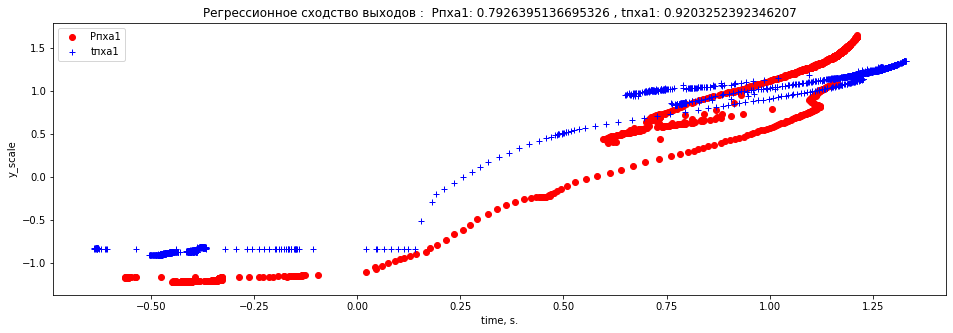

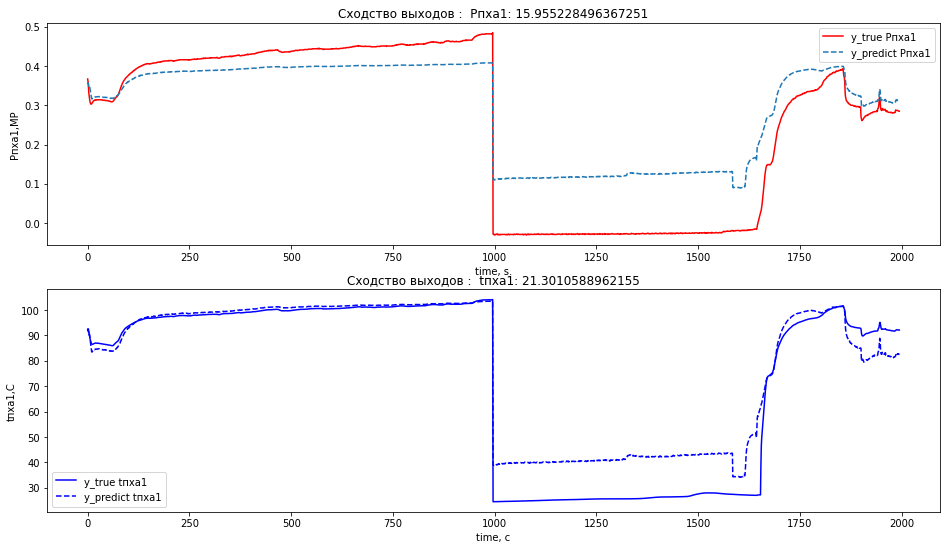

Процесс обучения...
Epoch 1/200
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2425 - mae: 0.3991 - val_loss: 0.2457 - val_mae: 0.4259
Epoch 2/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0296 - mae: 0.1391 - val_loss: 0.1096 - val_mae: 0.2688
Epoch 3/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0166 - mae: 0.1085 - val_loss: 0.0901 - val_mae: 0.2288
Epoch 4/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0135 - mae: 0.0991 - val_loss: 0.0855 - val_mae: 0.2139
Epoch 5/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0123 - mae: 0.0962 - val_loss: 0.0960 - val_mae: 0.2311
Epoch 6/200
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0118 - mae: 0.0953 - val_loss: 0.1039 - val_mae: 0.2323
Epoch 7/200
998/998 [==============================] - 2s 2ms/step - loss: 0.1158 - mae: 0.2519
Результат при тестировании: 0.11580026894807816
Тестовая точность: 0.25187

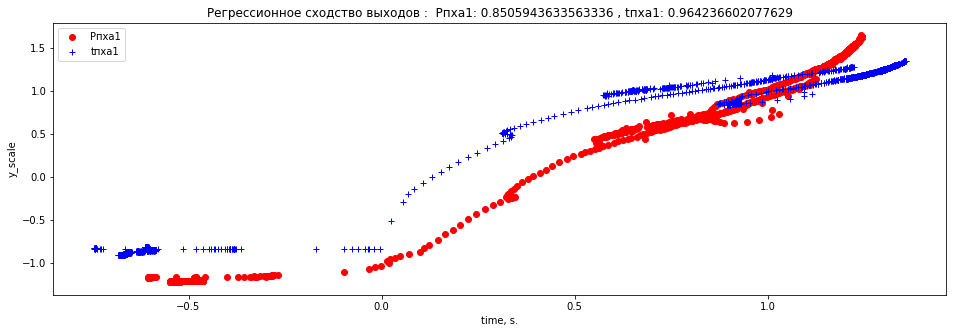

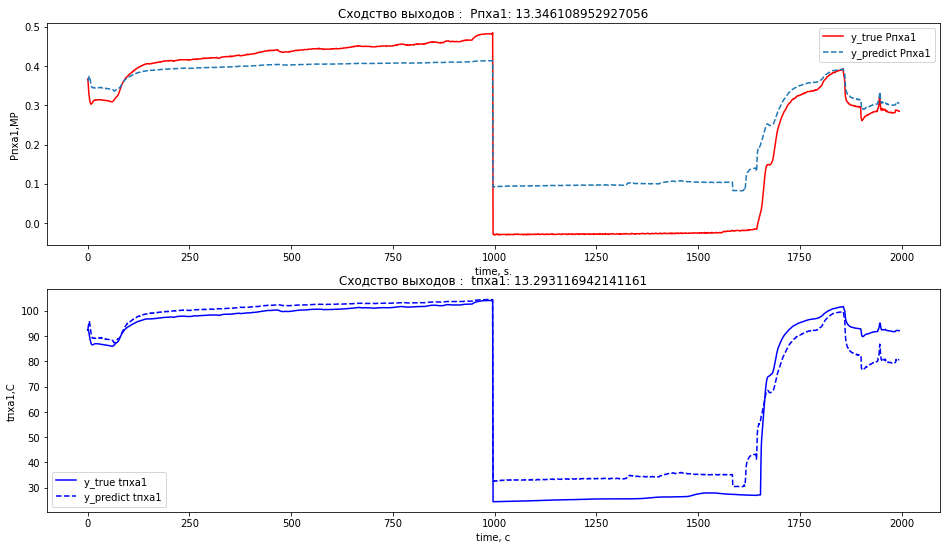

Процесс обучения...
Epoch 1/200
300/300 [==============================] - 2s 6ms/step - loss: 0.6329 - mae: 0.7114 - val_loss: 1.4611 - val_mae: 1.1220
Epoch 2/200
300/300 [==============================] - 2s 6ms/step - loss: 0.5324 - mae: 0.6429 - val_loss: 1.2834 - val_mae: 1.0377
Epoch 3/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4018 - mae: 0.5435 - val_loss: 0.9877 - val_mae: 0.8938
Epoch 4/200
300/300 [==============================] - 2s 6ms/step - loss: 0.2471 - mae: 0.4017 - val_loss: 0.6301 - val_mae: 0.6957
Epoch 5/200
300/300 [==============================] - 2s 6ms/step - loss: 0.1261 - mae: 0.2572 - val_loss: 0.3847 - val_mae: 0.5214
Epoch 6/200
300/300 [==============================] - 2s 6ms/step - loss: 0.0660 - mae: 0.1790 - val_loss: 0.2521 - val_mae: 0.4085
Epoch 7/200
300/300 [==============================] - 2s 6ms/step - loss: 0.0445 - mae: 0.1575 - val_loss: 0.1907 - val_mae: 0.3524
Epoch 8/200
300/300 [============================

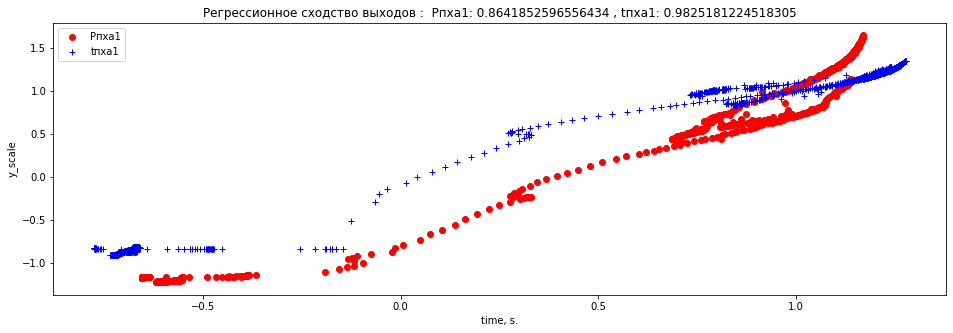

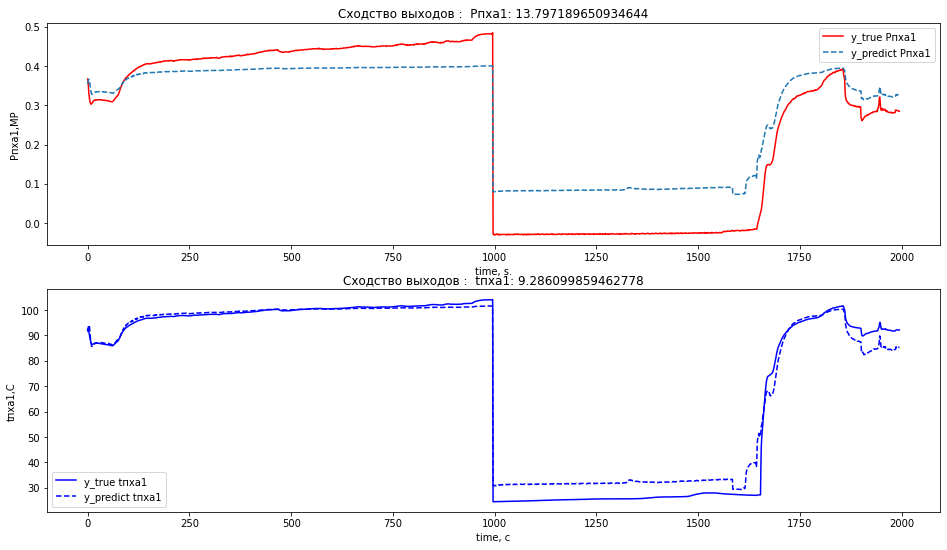

Процесс обучения...
Epoch 1/200
300/300 [==============================] - 2s 6ms/step - loss: 0.6651 - mae: 0.7461 - val_loss: 1.2787 - val_mae: 1.0472
Epoch 2/200
300/300 [==============================] - 2s 6ms/step - loss: 0.5403 - mae: 0.6069 - val_loss: 1.0767 - val_mae: 0.9234
Epoch 3/200
300/300 [==============================] - 2s 6ms/step - loss: 0.4156 - mae: 0.4848 - val_loss: 0.8333 - val_mae: 0.7951
Epoch 4/200
300/300 [==============================] - 2s 5ms/step - loss: 0.2978 - mae: 0.4054 - val_loss: 0.6029 - val_mae: 0.6756
Epoch 5/200
300/300 [==============================] - 2s 6ms/step - loss: 0.1944 - mae: 0.3350 - val_loss: 0.4102 - val_mae: 0.5681
Epoch 6/200
300/300 [==============================] - 2s 5ms/step - loss: 0.1113 - mae: 0.2613 - val_loss: 0.2675 - val_mae: 0.4706
Epoch 7/200
300/300 [==============================] - 2s 6ms/step - loss: 0.0584 - mae: 0.1963 - val_loss: 0.1872 - val_mae: 0.3978
Epoch 8/200
300/300 [============================

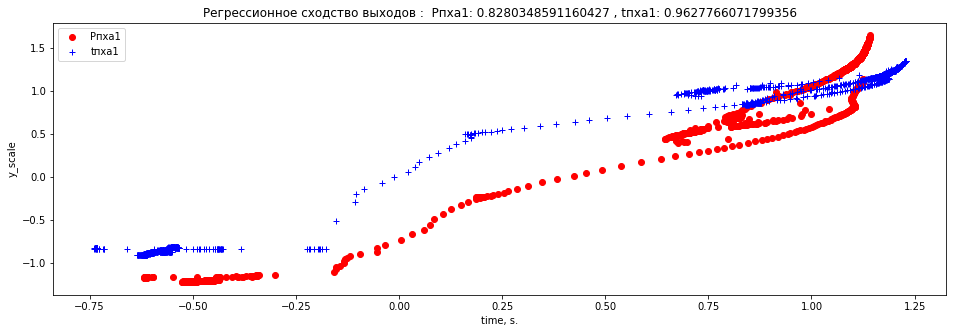

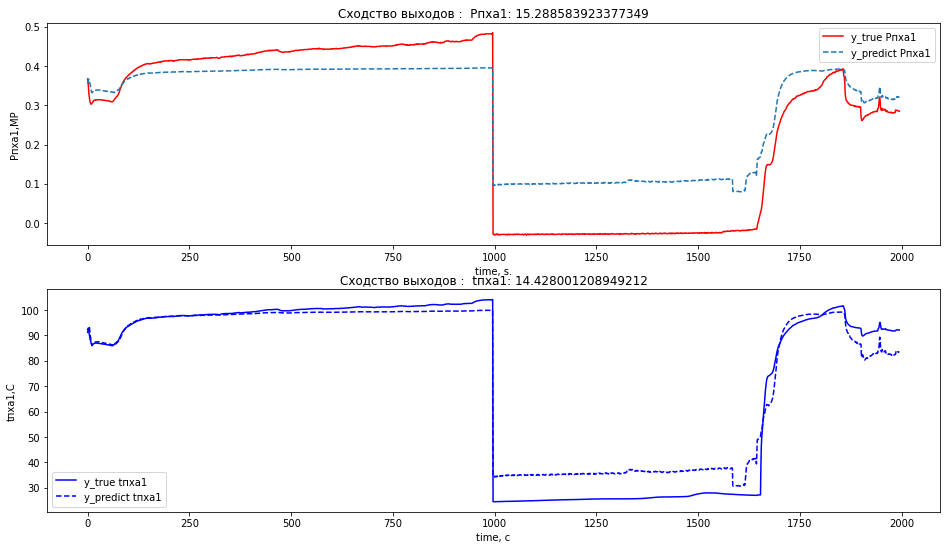

Процесс обучения...
Epoch 1/200
150/150 [==============================] - 1s 7ms/step - loss: 0.7243 - mae: 0.8067 - val_loss: 1.2691 - val_mae: 1.0641
Epoch 2/200
150/150 [==============================] - 1s 6ms/step - loss: 0.5823 - mae: 0.7151 - val_loss: 1.1875 - val_mae: 1.0249
Epoch 3/200
150/150 [==============================] - 1s 6ms/step - loss: 0.4809 - mae: 0.6347 - val_loss: 1.0832 - val_mae: 0.9612
Epoch 4/200
150/150 [==============================] - 1s 6ms/step - loss: 0.3874 - mae: 0.5498 - val_loss: 0.9260 - val_mae: 0.8701
Epoch 5/200
150/150 [==============================] - 1s 6ms/step - loss: 0.2975 - mae: 0.4616 - val_loss: 0.7687 - val_mae: 0.7703
Epoch 6/200
150/150 [==============================] - 1s 6ms/step - loss: 0.2192 - mae: 0.3726 - val_loss: 0.6170 - val_mae: 0.6684
Epoch 7/200
150/150 [==============================] - 1s 6ms/step - loss: 0.1584 - mae: 0.2949 - val_loss: 0.4900 - val_mae: 0.5768
Epoch 8/200
150/150 [============================

KeyboardInterrupt: ignored

In [ ]:
k=0
epoch_= 200
for n_LSTM in [1,3,5,7,10]:
  for n_DENSE in [2,10,100,200]:
    for batch_s in [2,10,20,100]:
      r2_1=[]
      r2_0=[]
      m_1=[]
      m_0=[]
      ep=[]
      k+=1
      for i in range(2):
        _, hist, score, acc,r2_y0, r2_y1,MAPE_y0,MAPE_y1=LSTM_model(X_train=X_t,y_train=y_t, X_test=X_test, y_test=y_test,xLen = 10, xInp = 12, n_lstm=n_LSTM,n_dense = n_DENSE, batch_size=batch_s,epoch = epoch_)
        r2_1.append(r2_y1)
        r2_0.append(r2_y0)
        m_1.append(MAPE_y1)
        m_0.append(MAPE_y0)
        ep.append(len(hist.history['loss']))
      Rez_data.loc[k,:]=np.array([n_LSTM,n_DENSE,batch_s,np.mean(ep),np.mean(r2_0),np.mean(r2_1),np.mean(m_0),np.mean(m_1)])  
      Rez_data.to_csv('Res.csv')

Процесс обучения...
Epoch 1/20
300/300 [==============================] - 7s 24ms/step - loss: 0.1939 - mae: 0.3321 - val_loss: 0.1167 - val_mae: 0.2925
Epoch 2/20
300/300 [==============================] - 7s 23ms/step - loss: 0.0404 - mae: 0.1630 - val_loss: 0.0932 - val_mae: 0.2659
Epoch 3/20
300/300 [==============================] - 7s 23ms/step - loss: 0.0335 - mae: 0.1459 - val_loss: 0.0858 - val_mae: 0.2539
Epoch 4/20
300/300 [==============================] - 7s 24ms/step - loss: 0.0219 - mae: 0.1212 - val_loss: 0.1062 - val_mae: 0.2773
Epoch 5/20
300/300 [==============================] - 7s 23ms/step - loss: 0.0090 - mae: 0.0761 - val_loss: 0.0829 - val_mae: 0.2355
Epoch 6/20
300/300 [==============================] - 7s 24ms/step - loss: 0.0050 - mae: 0.0545 - val_loss: 0.0715 - val_mae: 0.2139
Epoch 7/20
300/300 [==============================] - 7s 23ms/step - loss: 0.0041 - mae: 0.0489 - val_loss: 0.0654 - val_mae: 0.1971
Epoch 8/20
300/300 [=============================

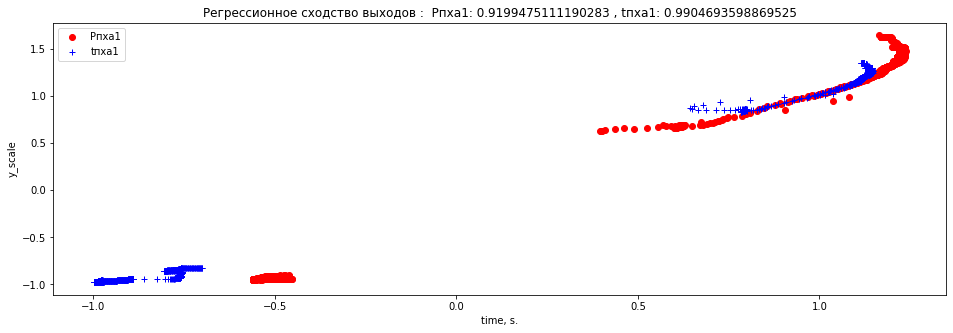

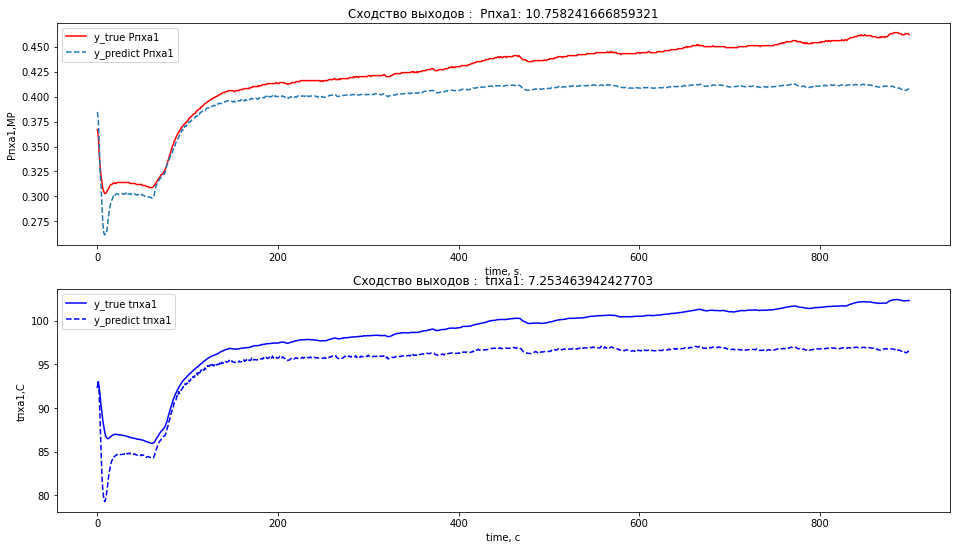

In [ ]:
_, hist, score, acc,r2_y0, r2_y1,MAPE_y0,MAPE_y1=LSTM_model(X_train=X_t,y_train=y_t, X_test=X_test, y_test=y_test,xLen = 10, xInp = 12, n_lstm=5,n_dense = 100, batch_size=10,epoch = 20)


In [ ]:
Rez_data=pd.read_csv('/content/Res.csv')

In [ ]:
Rez_data.columns

Index(['Unnamed: 0', 'n_lstm', 'n_dense ', 'batch_size', 'epoch', 'r2_y0',
       'r2_y1', 'MAPE_y0', 'MAPE_y1'],
      dtype='object')

In [ ]:
Rez_data.head()


,Unnamed: 0,n_lstm,n_dense,batch_size,epoch,r2_y0,r2_y1,MAPE_y0,MAPE_y1
0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,1,1.0,2.0,2.0,9.4,0.847827,0.958931,13.555676,14.800690
2,2,1.0,2.0,10.0,17.6,0.861999,0.978929,13.815992,10.211535
3,3,1.0,2.0,20.0,18.8,0.558964,0.419627,24.004890,31.435832
4,4,1.0,2.0,100.0,50.6,0.464254,0.362116,26.681484,28.766969


In [ ]:
Loss = Loss+hist.history['loss'].copy()
Loss_val = Loss_val+hist.history['val_loss'].copy()

In [ ]:
Rez_data=Rez_data.drop(0)

In [ ]:
n1=Rez_data['n_dense '].unique()
n2=Rez_data['n_lstm'].unique()
n1,n2

(array([  2.,  10., 100., 200.]), array([1., 3., 5., 7.]))

In [ ]:
nn1 = np.zeros((n1.shape[0],n2.shape[0]))
nn2 = np.zeros((n1.shape[0],n2.shape[0]))
for i in range(n1.shape[0]):
  for j in range(n2.shape[0]):
    nn1[i,j] = np.mean(Rez_data.loc[(Rez_data['n_dense ']==n1[i])&(Rez_data['n_lstm']==n2[j]),'MAPE_y0'] )
    nn2[i,j] = np.mean(Rez_data.loc[(Rez_data['n_dense ']==n1[i])&(Rez_data['n_lstm']==n2[j]),'MAPE_y1'] )

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


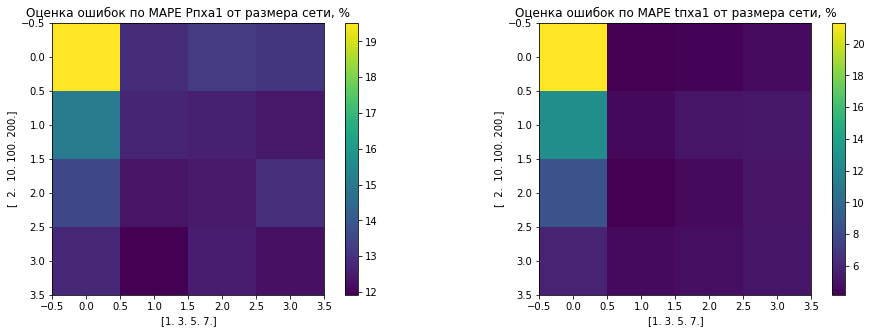

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.imshow((nn1).astype(float))
plt.ylabel(n1)
plt.xlabel(n2)
plt.axis('on')
plt.colorbar()
plt.title('Оценка ошибок по MAPE Pпха1 от размера сети, %')
plt.subplot(1,2,2)
plt.imshow((nn2).astype(float))
plt.ylabel(n1)
plt.xlabel(n2)
plt.axis('on')
plt.colorbar()
plt.title('Оценка ошибок по MAPE tпха1 от размера сети, %')
plt.show()

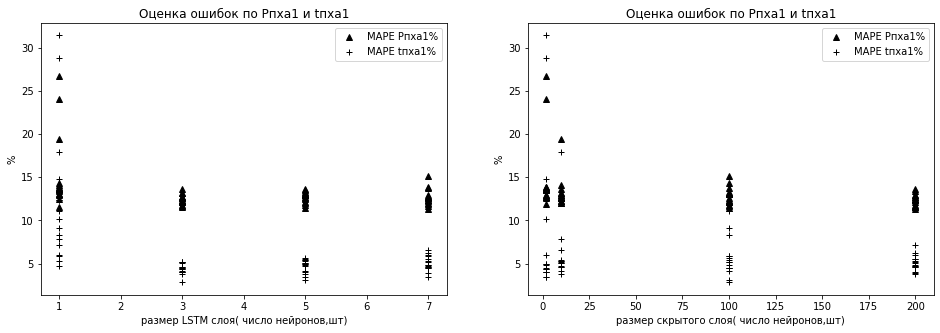

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(Rez_data['n_lstm'],Rez_data['MAPE_y0'],'^k',label='MAPE '+TARGET[0]+'%')
plt.plot(Rez_data['n_lstm'],Rez_data['MAPE_y1'],'+k',label='MAPE '+TARGET[1]+'%')
plt.xlabel('размер LSTM слоя( число нейронов,шт)')
plt.legend()
plt.title('Оценка ошибок по '+TARGET[0]+' и '+TARGET[1])
plt.ylabel('%')
plt.subplot(1,2,2)
plt.plot(Rez_data['n_dense '],Rez_data['MAPE_y0'],'^k',label='MAPE '+TARGET[0]+'%')
plt.plot(Rez_data['n_dense '],Rez_data['MAPE_y1'],'+k',label='MAPE '+TARGET[1]+'%')
plt.xlabel('размер скрытого слоя( число нейронов,шт)')
plt.legend()
plt.title('Оценка ошибок по '+TARGET[0]+' и '+TARGET[1])
plt.ylabel('%')
plt.show()

Процесс обучения...
Epoch 1/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0015 - mae: 0.0233 - val_loss: 0.0899 - val_mae: 0.1856
Epoch 2/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0017 - mae: 0.0240 - val_loss: 0.0993 - val_mae: 0.1989
Epoch 3/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0018 - mae: 0.0256 - val_loss: 0.0909 - val_mae: 0.1894
Epoch 4/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0016 - mae: 0.0233 - val_loss: 0.0946 - val_mae: 0.1899
Epoch 5/5
200/200 [==============================] - 0s 2ms/step - loss: 0.0878 - mae: 0.1838


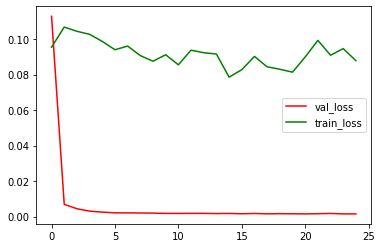

Результат при тестировании: 0.08781954646110535
Тестовая точность: 0.183847576379776


In [ ]:
print('Процесс обучения...')
hist= model.fit(X_t.reshape((X_t.shape[0],xLen, xInp)), y_t,
          batch_size=batch_size,
          epochs=5, # увеличьте при необходимости
          validation_data=(X_test.reshape((X_test.shape[0],xLen, xInp)), y_test))
score, acc = model.evaluate(X_test.reshape((X_test.shape[0],xLen, xInp)), y_test,
                            batch_size=batch_size)

Loss = Loss+hist.history['loss'].copy()
Loss_val = Loss_val+hist.history['val_loss'].copy()

plt.plot(Loss,'r',label='val_loss')
plt.plot(Loss_val,'g',label='train_loss')
plt.legend()
plt.show()
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)

In [ ]:
def Dense_model(X_train=None,y_train=None, X_test=None, y_test=None, scy=scy,xLen = 10, xInp = 12, n_lstm=10,n_dense = 10, batch_size=10,epoch = 10):
  callback = EarlyStopping(monitor='val_loss', patience=3)
  TARGET = ['Pпха1','tпха1']
  
  model = Sequential()
  model.add(Dense(n_lstm,  input_shape=(xLen* xInp,)))
  model.add(Dense(n_dense, activation='sigmoid'))
  model.add(Dense(n_dense, activation='sigmoid'))
  model.add(Dense(2, activation='linear'))

  # стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
  model.compile(loss='mse',optimizer='adam', metrics=['mae'])

  print('Процесс обучения...')
  hist= model.fit(X_t, y_t,
          batch_size=batch_size,
          epochs=epoch, # увеличьте при необходимости
          validation_data=(X_test, y_test),callbacks=[callback],verbose=1)
  score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)

  y_pb = model.predict(X_test)
  r2_y0 = r2_score(y_true=y_test[:,0],y_pred=y_pb[:,0])
  r2_y1 = r2_score(y_true=y_test[:,1],y_pred=y_pb[:,1])

  yc=scy.inverse_transform(y_test)
  ycb=scy.inverse_transform(y_pb)
  MAPE_y0 = np.mean(np.abs(yc[:,0]-ycb[:,0])/np.max(yc[:,0]))*100
  MAPE_y1 = np.mean(np.abs(yc[:,1]-ycb[:,1])/np.abs(yc[:,1]))*100
  print('Результат при тестировании R2:', r2_y0, r2_y0)
  print('Тестовая ошибка MAPE:', MAPE_y0,MAPE_y1)

  plt.figure(figsize=(16,5))
  plt.plot(y_pb[:,0],y_test[:,0],'or', label=TARGET[0])
  plt.title('Регрессионное сходство выходов :  '+TARGET[0]+': '+str(r2_y0)+' , '+TARGET[1]+': '+str(r2_y1))
  plt.xlabel('time, s.')
  plt.ylabel('y_scale')
  plt.plot(y_pb[:,1],y_test[:,1],'+b', label=TARGET[1])
  plt.legend()
  plt.show()

  plt.figure(figsize=(16,9))
  plt.subplot(2,1,1)
  plt.plot(yc[:,0],'r', label='y_true '+TARGET[0])
  plt.plot(ycb[:,0],'--', label='y_predict '+TARGET[0])
  plt.title('Cходство выходов :  '+TARGET[0]+': '+str(MAPE_y0))
  plt.xlabel('time, s.')
  plt.ylabel(TARGET[0]+',MP')
  plt.legend()
  
  plt.subplot(2,1,2)
  plt.plot(yc[:,1],'b', label='y_true '+TARGET[1])
  plt.plot(ycb[:,1],'--b', label='y_predict '+TARGET[1])
  plt.title('Cходство выходов :  '+TARGET[1]+': '+str(MAPE_y1))
  plt.xlabel('time, c')
  plt.ylabel(TARGET[1]+',C')
  plt.legend()
  plt.show()
  
  return model, hist, score, acc,r2_y0, r2_y1,MAPE_y0,MAPE_y1 


Процесс обучения...
Epoch 1/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0646 - mae: 0.1893 - val_loss: 0.2610 - val_mae: 0.4011
Epoch 2/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0066 - mae: 0.0638 - val_loss: 0.3181 - val_mae: 0.3815
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0027 - mae: 0.0390 - val_loss: 0.3551 - val_mae: 0.3830
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.3634 - mae: 0.3895
Результат при тестировании: 0.36342281103134155
Тестовая точность: 0.3894990384578705
Результат при тестировании R2: 0.5231446107313515 0.5231446107313515
Тестовая ошибка MAPE: 20.16770133652946 29.16661395846466


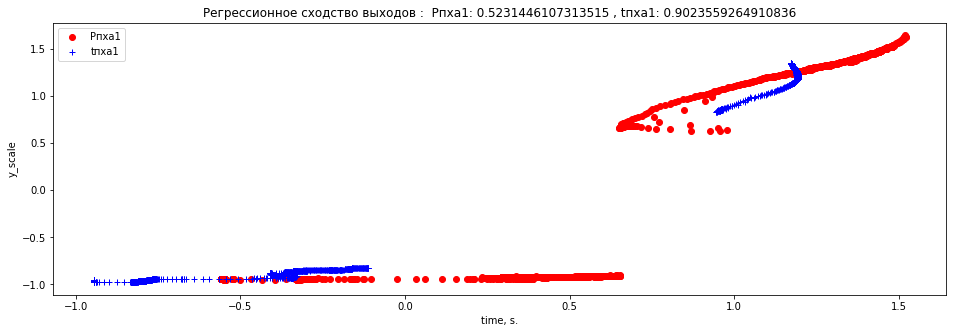

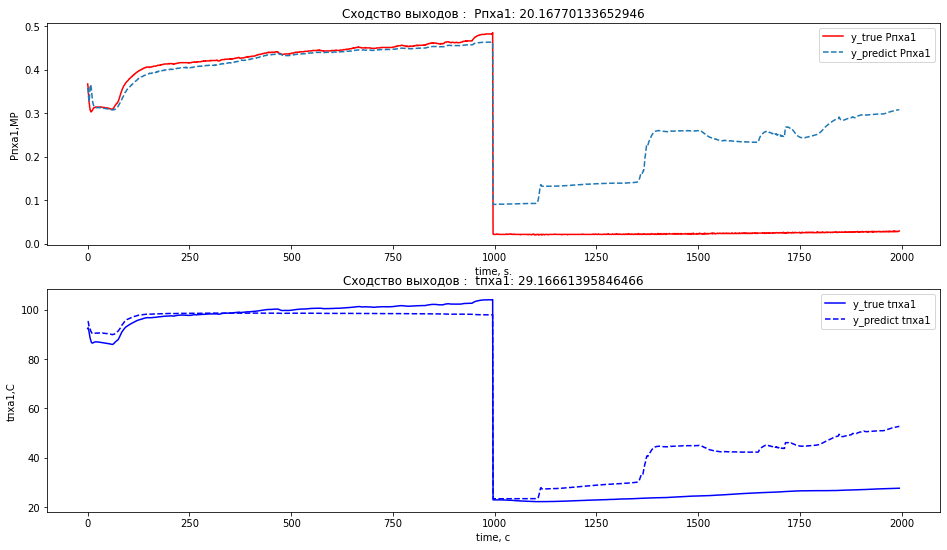

In [ ]:
_, hist, score, acc,r2_y0, r2_y1,MAPE_y0,MAPE_y1=Dense_model(X_train=X_t,y_train=y_t, X_test=X_test, y_test=y_test,xLen = 10, xInp = 12, n_lstm=100,n_dense = 20, batch_size=10,epoch = 20)
        

In [ ]:
modeld = Sequential()
modeld.add(Dense(1000, activation='linear', input_shape=(xLen*xInp,)))
modeld.add(Dense(10, activation='sigmoid', input_shape=(xLen*xInp,)))

modeld.add(Dense(2, activation='linear'))

# стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
modeld.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

print('Процесс обучения...')
histd= modeld.fit(X_t, y_t,
          batch_size=batch_size,
          epochs=17, # увеличьте при необходимости
          validation_data=(X_test, y_test))
score, acc = modeld.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Результат при тестировании:', score)
print('Тестовая точность:', acc)

Процесс обучения...
Epoch 1/17
300/300 [==============================] - 1s 3ms/step - loss: 0.0287 - mae: 0.1157 - val_loss: 0.0998 - val_mae: 0.2640
Epoch 2/17
300/300 [==============================] - 1s 3ms/step - loss: 0.0079 - mae: 0.0642 - val_loss: 0.1114 - val_mae: 0.2366
Epoch 3/17
300/300 [==============================] - 1s 3ms/step - loss: 0.0043 - mae: 0.0457 - val_loss: 0.1239 - val_mae: 0.2471
Epoch 4/17
300/300 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0378 - val_loss: 0.1126 - val_mae: 0.2408
Epoch 5/17
300/300 [==============================] - 1s 3ms/step - loss: 0.0028 - mae: 0.0359 - val_loss: 0.1246 - val_mae: 0.2392
Epoch 6/17
300/300 [==============================] - 1s 3ms/step - loss: 0.0030 - mae: 0.0369 - val_loss: 0.1181 - val_mae: 0.2286
Epoch 7/17
300/300 [==============================] - 1s 3ms/step - loss: 0.0026 - mae: 0.0341 - val_loss: 0.1119 - val_mae: 0.2195
Epoch 8/17
300/300 [==============================] - 1s

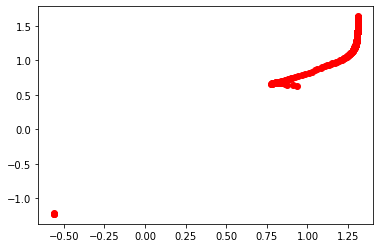

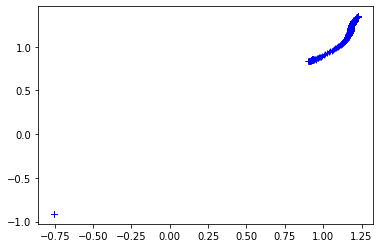

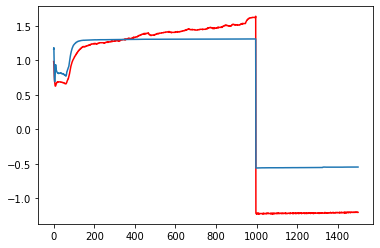

In [ ]:
y_pb = modeld.predict(X_test)


plt.plot(y_pb[10:1000,0],y_test[10:1000,0],'or')
plt.show()
plt.plot(y_pb[10:1000,1],y_test[10:1000,1],'+b')
plt.show()


plt.plot(y_test[:1500,0],'r')
plt.plot(y_pb[:1500,0])
plt.show()

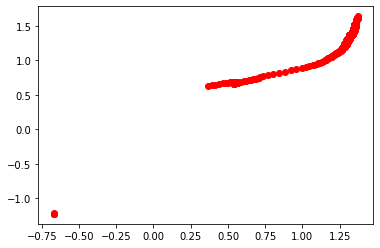

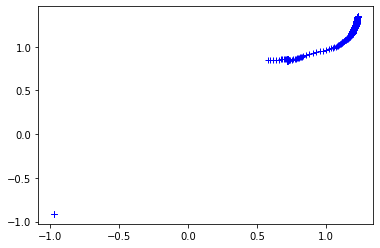

In [ ]:
y_p = model.predict(X_test.reshape((X_test.shape[0],xLen, xInp)))


plt.plot(y_p[10:1000,0],y_test[10:1000,0],'or')
plt.show()
plt.plot(y_p[10:1000,1],y_test[10:1000,1],'+b')
plt.show()

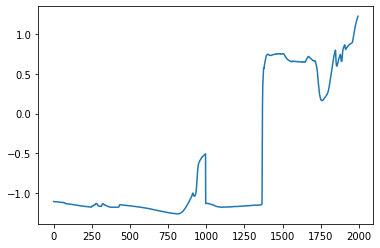

In [ ]:
plt.plot(X_test[:,3])
plt.show()

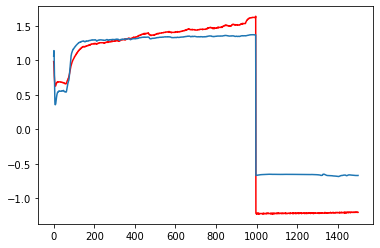

In [ ]:
plt.plot(y_test[:1500,0],'r')
plt.plot(y_p[:1500,0])
plt.show()

In [ ]:
X_test.reshape((X_test.shape[0],10,12))[0,]

array([[-1.06383758, -0.92164407, -0.99205624, -1.10386666, -0.98797027,
        -0.98863026, -0.99338814, -0.97688242, -0.97700186, -0.98329535,
        -1.16654144, -0.94035432],
       [-1.0640997 , -0.92167936, -0.99210545, -1.10485342, -0.98803917,
        -0.98700886, -0.99481647, -0.97693005, -0.97706255, -0.9816928 ,
        -1.16660479, -0.94037997],
       [-1.06425184, -0.92172485, -0.99056539, -1.10507765, -0.98810154,
        -0.98705381, -0.99488264, -0.97695354, -0.97711448, -0.98176114,
        -1.16665679, -0.94042092],
       [-1.06426369, -0.92176657, -0.99063656, -1.10521713, -0.9881983 ,
        -0.98548318, -0.99496932, -0.97702335, -0.97719695, -0.98183351,
        -1.1667157 , -0.94044767],
       [-1.06436032, -0.92180913, -0.99067076, -1.10544292, -0.98826981,
        -0.98553893, -0.99504384, -0.97709797, -0.97725946, -0.9818563 ,
        -1.16676982, -0.94048309],
       [-1.05824882, -0.92184503, -0.99072676, -1.10559464, -0.98829743,
        -0.98558161, -

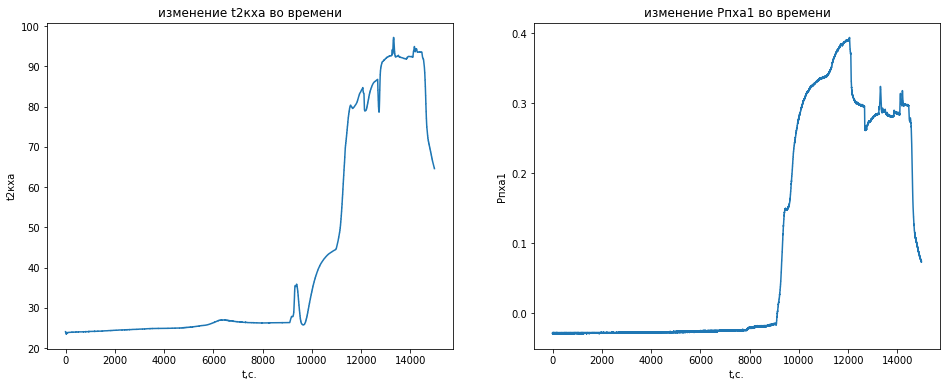

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
f2.iloc[:,4].plot()
plt.xlabel('t,c.')
plt.ylabel(f2.columns[4])
plt.title('изменение '+f2.columns[4]+' во времени')
plt.subplot(1,2,2)
f2.iloc[:,1].plot()
plt.xlabel('t,c.')
plt.ylabel(TARGET[0])
plt.title('изменение '+TARGET[0]+' во времени')
plt.show()



In [ ]:
f2.head()

,/Pкха,Pпха1,t1впг,/t1пг,t2кха,/t2пг,/t3пг,/t4пг,/t5пг,/t6пг,/t7пг,впг'',tвпг',tпха1
0,-0.074,-0.029,24.368,26.253,24.067,26.088,26.033,26.143,25.754,25.699,25.644,24.218,23.967,24.468
1,-0.075,-0.030,24.368,26.198,24.067,26.088,26.033,26.143,25.816,25.699,25.706,24.218,23.967,24.468
2,-0.075,-0.029,24.368,26.198,24.067,26.088,26.033,26.143,25.754,25.761,25.644,24.218,23.967,24.468
3,-0.073,-0.028,24.368,26.260,24.067,26.150,26.095,26.143,25.816,25.761,25.644,24.218,23.967,24.468
4,-0.075,-0.029,24.368,26.260,24.067,26.150,26.095,26.143,25.816,25.699,25.706,24.218,23.967,24.468


In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPool1D

In [ ]:
def Conv_model(X_train=None,y_train=None, X_test=None, y_test=None, scy=scy,xLen = 10, xInp = 12, n_lstm=10,n_dense = 10, batch_size=10,epoch = 10):
  callback = EarlyStopping(monitor='val_loss', patience=3)
  TARGET = ['Pпха1','tпха1']
  
  model = Sequential()
  model.add(Conv1D(n_lstm,3,  input_shape=(xLen* xInp,1,)))
  model.add(Conv1D(n_dense,3, activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(n_lstm,3, activation='relu' ))
  model.add(Conv1D(n_dense,3, activation='relu'))
  model.add(MaxPooling1D())
  model.add(Flatten())
  model.add(Dense(10, activation='linear'))
  model.add(Dense(2, activation='linear'))

  # стоит попробовать использовать другие оптимайзер и другие конфигурации оптимайзеров 
  model.compile(loss='mse',optimizer='adam', metrics=['mae'])

  print('Процесс обучения...')
  hist= model.fit(X_t.reshape((X_t.shape[0],xLen*xInp,1)), y_t,
          batch_size=batch_size,
          epochs=epoch, # увеличьте при необходимости
          validation_data=(X_test.reshape((X_test.shape[0],xLen*xInp,1)), y_test),callbacks=[callback],verbose=1)
  score, acc = model.evaluate(X_test.reshape((X_test.shape[0],xLen*xInp,1)), y_test,
                            batch_size=batch_size)
  print('Результат при тестировании:', score)
  print('Тестовая точность:', acc)

  y_pb = model.predict(X_test.reshape((X_test.shape[0],xLen*xInp,1)))
  r2_y0 = r2_score(y_true=y_test[:,0],y_pred=y_pb[:,0])
  r2_y1 = r2_score(y_true=y_test[:,1],y_pred=y_pb[:,1])

  yc=scy.inverse_transform(y_test)
  ycb=scy.inverse_transform(y_pb)
  MAPE_y0 = np.mean(np.abs(yc[:,0]-ycb[:,0])/np.max(yc[:,0]))*100
  MAPE_y1 = np.mean(np.abs(yc[:,1]-ycb[:,1])/np.abs(yc[:,1]))*100
  print('Результат при тестировании R2:', r2_y0, r2_y0)
  print('Тестовая ошибка MAPE:', MAPE_y0,MAPE_y1)

  plt.figure(figsize=(16,5))
  plt.plot(y_pb[:,0],y_test[:,0],'or', label=TARGET[0])
  plt.title('Регрессионное сходство выходов :  '+TARGET[0]+': '+str(r2_y0)+' , '+TARGET[1]+': '+str(r2_y1))
  plt.xlabel('time, s.')
  plt.ylabel('y_scale')
  plt.plot(y_pb[:,1],y_test[:,1],'+b', label=TARGET[1])
  plt.legend()
  plt.show()

  plt.figure(figsize=(16,9))
  plt.subplot(2,1,1)
  plt.plot(yc[:,0],'r', label='y_true '+TARGET[0])
  plt.plot(ycb[:,0],'--', label='y_predict '+TARGET[0])
  plt.title('Cходство выходов :  '+TARGET[0]+': '+str(MAPE_y0))
  plt.xlabel('time, s.')
  plt.ylabel(TARGET[0]+',MP')
  plt.legend()
  
  plt.subplot(2,1,2)
  plt.plot(yc[:,1],'b', label='y_true '+TARGET[1])
  plt.plot(ycb[:,1],'--b', label='y_predict '+TARGET[1])
  plt.title('Cходство выходов :  '+TARGET[1]+': '+str(MAPE_y1))
  plt.xlabel('time, c')
  plt.ylabel(TARGET[1]+',C')
  plt.legend()
  plt.show()
  
  return model, hist, score, acc,r2_y0, r2_y1,MAPE_y0,MAPE_y1

Процесс обучения...
Epoch 1/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0408 - mae: 0.1182 - val_loss: 0.1169 - val_mae: 0.2905
Epoch 2/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0016 - mae: 0.0271 - val_loss: 0.1189 - val_mae: 0.2970
Epoch 3/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0014 - mae: 0.0265 - val_loss: 0.1143 - val_mae: 0.2915
Epoch 4/20
300/300 [==============================] - 2s 6ms/step - loss: 0.0012 - mae: 0.0244 - val_loss: 0.0885 - val_mae: 0.2586
Epoch 5/20
300/300 [==============================] - 2s 6ms/step - loss: 6.0325e-04 - mae: 0.0180 - val_loss: 0.0731 - val_mae: 0.2335
Epoch 6/20
300/300 [==============================] - 2s 6ms/step - loss: 7.4766e-04 - mae: 0.0198 - val_loss: 0.0669 - val_mae: 0.2166
Epoch 7/20
300/300 [==============================] - 2s 7ms/step - loss: 7.1067e-04 - mae: 0.0191 - val_loss: 0.0626 - val_mae: 0.2112
Epoch 8/20
300/300 [========================

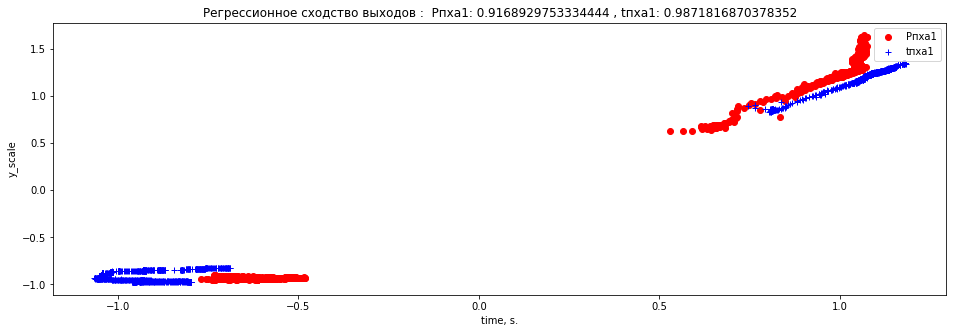

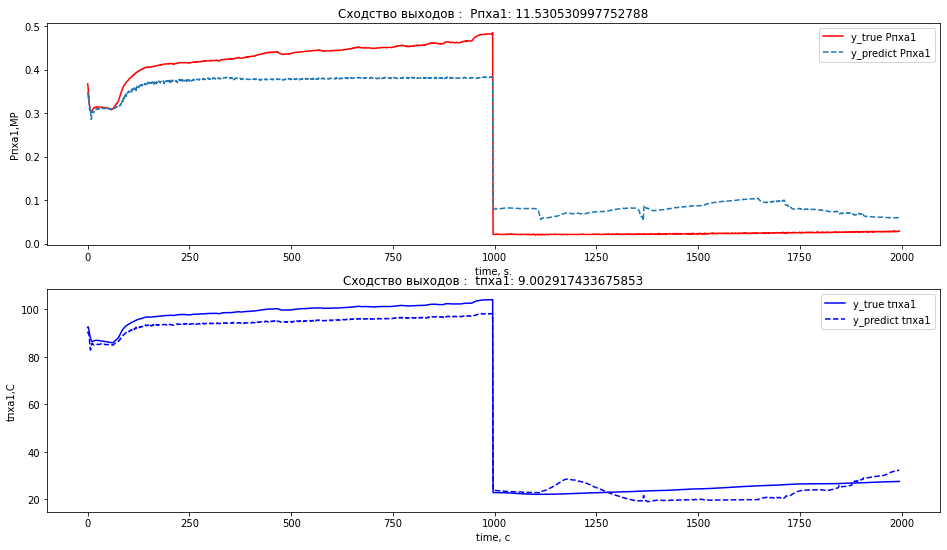

In [ ]:
_, hist, score, acc,r2_y0, r2_y1,MAPE_y0,MAPE_y1=Conv_model(X_train=X_t,y_train=y_t, X_test=X_test, y_test=y_test,xLen = 10, xInp = 12, n_lstm=50,n_dense = 10, batch_size=10,epoch = 20)